<a href="https://colab.research.google.com/github/kyleegit27/EDA/blob/main/GSS_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#EDA


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
var_list = ['id', 'year', 'marital', 'hapmar', 'agewed', 'frinum', 'hrs2', 'life', 'income', 'sathealt', 'sexfreq2', 'ownfate', 'nihilism', 'fefam'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [5]:
df = pd.read_csv('selected_gss_data.csv')

<ipython-input-5-ad818602ddea>:1: DtypeWarning: Columns (9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('selected_gss_data.csv')


In [6]:
df.tail(6)

,id,year,marital,hapmar,agewed,frinum,hrs2,life,income,sathealt,sexfreq2,ownfate,nihilism,fefam
72384,3540,2022,widowed,NaN,NaN,NaN,NaN,routine,"$20,000 to $24,999",NaN,NaN,NaN,NaN,NaN
72385,3541,2022,never married,NaN,NaN,NaN,NaN,routine,"$25,000 or more",NaN,NaN,NaN,NaN,strongly disagree
72386,3542,2022,married,very happy,NaN,NaN,NaN,routine,"$25,000 or more",NaN,NaN,NaN,NaN,disagree
72387,3543,2022,never married,NaN,NaN,NaN,NaN,NaN,"$25,000 or more",NaN,NaN,NaN,NaN,strongly disagree
72388,3544,2022,married,very happy,NaN,NaN,NaN,exciting,"$25,000 or more",NaN,NaN,NaN,NaN,NaN
72389,3545,2022,married,pretty happy,NaN,NaN,NaN,NaN,"$25,000 or more",NaN,NaN,NaN,NaN,strongly disagree


In [7]:
#df['income'].value_counts()
#EDA
df['income'].isna().sum()

8951

In [8]:
df['sathealt'].value_counts()
#EDA
#health and physical condition

,count
sathealt,
great deal,7944
very great deal,6426
quite a bit,3618
a fair amount,3599
some,1099
a little,930
none,505


In [9]:
df['ownfate'].value_counts()
#we each make our own fate

,count
ownfate,
agree,1027
neither agree nor disagree,491
strongly agree,466
disagree,294
strongly disagree,138


In [10]:
df['life'].value_counts()
#is life exciting or dull

,count
life,
routine,21553
exciting,20463
dull,2227


In [11]:
df['fefam'].value_counts()
#better for man to work, women at home

,count
fefam,
disagree,15198
agree,9839
strongly disagree,7284
strongly agree,2810


In [12]:
df['sexfreq2'].value_counts()
# num x last month

,count
sexfreq2,
4.0,45
10.0,37
2.0,36
8.0,36
6.0,32
5.0,30
3.0,30
1.0,28
12.0,16


In [13]:
df['nihilism'].value_counts()
#life serves no purpose

,count
nihilism,
strongly disagree,2772
disagree,1733
neither agree nor disagree,265
agree,107
strongly agree,47


In [14]:
df['frinum'].value_counts()
#num of close friends

,count
frinum,
4.0,186
3.0,180
2.0,174
5.0,171
6.0,149
10.0,145
1.0,95
0.0,77
20.0,55


In [15]:
df['hapmar'].value_counts()
#happiness of marriage

,count
hapmar,
very happy,21427
pretty happy,11506
not too happy,1066


In [16]:
df['agewed'].value_counts()
#age when first married

,count
agewed,
21.0,3324
19.0,2886
18.0,2767
20.0,2719
22.0,2291
23.0,1980
24.0,1633
25.0,1477
17.0,1453


In [17]:
df['hrs2'].value_counts()
#num of hours typically work in a week

,count
hrs2,
40.0,590
50.0,115
45.0,71
60.0,61
30.0,59
...,...
2.0,1
68.0,1
23.0,1


In [18]:
df['marital'].value_counts()
#marital status

,count
marital,
married,37590
never married,15910
divorced,9642
widowed,6756
separated,2441


I chose about ten variables from the GSS data set to explore different trends and correlations. One key variable of interest is the happiness of marriage variable. I want to explore a range of factors and their correlation with this variable. Other variables include maritial status, age when first married, number of close friends, number of hours worked in a typical week, total family income, health and physical condition, and life outlooks. I predict that there will at least be some sort of association with these variables on happiness of marriage. I also will explore the relationships of these variables on each other such as health and physical condition on life outlook. I chose variables that are of interest to me and intuitively may have some connection, but I hope to explore this connection over time and the strength or nonexistence of the connection.

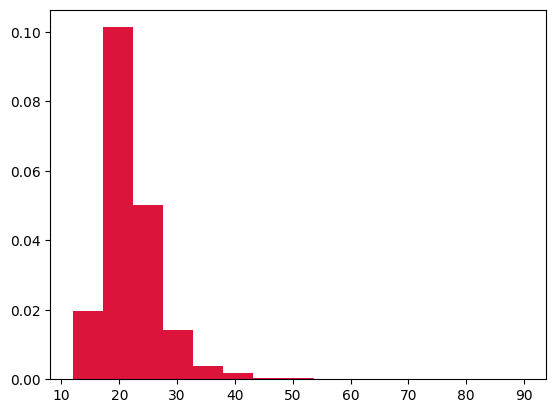

In [19]:
df['agewed'].hist(bins=15, grid=False, density = True, color='crimson')
plt.show()

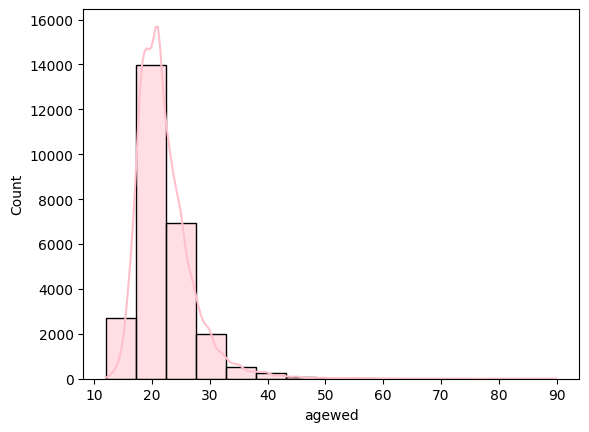

In [22]:
sns.histplot(data= df['agewed'], bins =15, kde = True, color='pink')
plt.show()

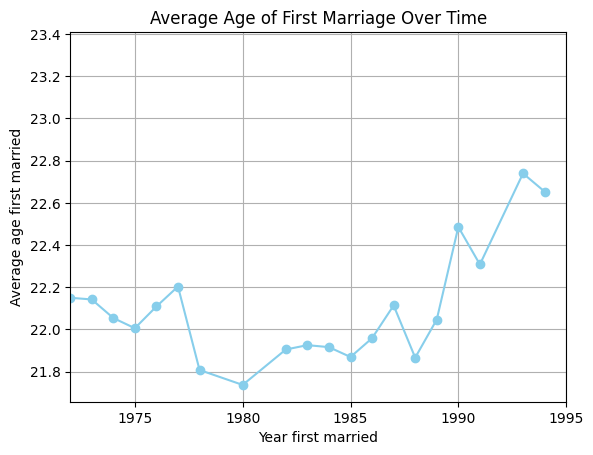

In [39]:
#look at age wed over time

#drop 2005 outlier
#missing data past 1995 and then outlier, so cutting off time past 1995

wed_time = df['agewed'].groupby(df['year']).mean()

plt.plot(wed_time.index, wed_time.values, marker='o', linestyle= '-', color='skyblue')
plt.xlabel('Year first married')
plt.ylabel('Average age first married')
plt.xlim(wed_time.index.min(), 1995) #cutting off x axis at 1995 to make graph space more useful(dropping missing data and outlier)
plt.title('Average Age of First Marriage Over Time')
plt.grid(True)
plt.show()

#This graph explores the average age a person gets first married over time. Over time, there is a general increase with a few dips. But, over these twenty-five years
#the range is generally pretty small. This graph surprises me because I would have thought there was a more steady increase, especially as the years got closer to 2000. As
# in present day, the average age is much older. It would also be interesting to explore this trend stratified by gender and sexual orientation.

<Axes: xlabel='wed_time'>

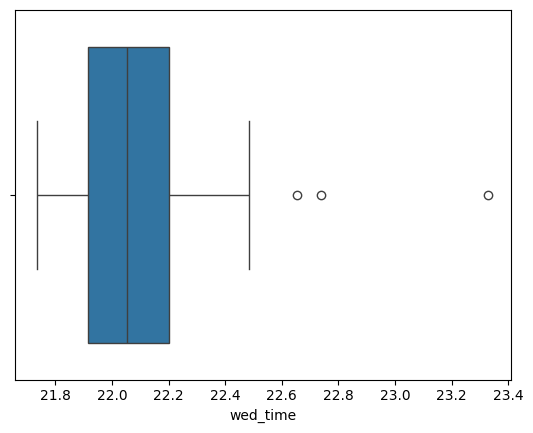

In [27]:
#EDA for line graph above, definite outlier at age 23.3
sns.boxplot(x=df['wed_time'])
#23.4 is an outlier, so drop that value
#df = df[df['wed_time'] != 23.4]
#replace as np.nan value
#df['wed_time'] = df['wed_time'].replace(23.3, np.nan)

#sns.boxplot(x=df['wed_time'])

In [28]:
vars = ['year', 'agewed']
df.loc[:, vars].corr()

,year,agewed
year,1.000000,0.049462
agewed,0.049462,1.000000


In [29]:
#collecting counts for side by side bar chart
#looking at happiness in marriage and nihilism over time

#first filter counts for each

hap_n = df['hapmar'].groupby(df['nihilism']).value_counts()
hap_n

nihilism                    hapmar       
agree                       very happy        25
                            pretty happy      16
                            not too happy      1
disagree                    very happy       453
                            pretty happy     299
                            not too happy     27
neither agree nor disagree  very happy        55
                            pretty happy      34
                            not too happy      5
strongly agree              very happy        10
                            pretty happy       6
                            not too happy      1
strongly disagree           very happy       927
                            pretty happy     464
                            not too happy     33
Name: count, dtype: int64

In [30]:
fate_n = df['ownfate'].groupby(df['nihilism']).value_counts()
fate_n

nihilism                    ownfate                   
agree                       agree                          34
                            strongly agree                 10
                            neither agree nor disagree      7
                            disagree                        4
                            strongly disagree               1
disagree                    agree                         417
                            neither agree nor disagree    180
                            disagree                      118
                            strongly agree                 92
                            strongly disagree              11
neither agree nor disagree  neither agree nor disagree     52
                            agree                          51
                            strongly agree                 21
                            disagree                        6
strongly agree              strongly agree                 12
                            agree                           4
                            disagree                        3
                            neither agree nor disagree      2
                            strongly disagree               1
strongly disagree           agree                         495
                            strongly agree                306
                            neither agree nor disagree    237
                            disagree                      158
                            strongly disagree             125
Name: count, dtype: int64

In [31]:
#regroup hrs2 - average, below average, above average
#using pd.cut()
#right = True (default for right end of range being included)
#Creating bins to make it more intuitive and easier to plot in the graph. Bins are from 0-25 hours, 26-49 hours, and +50 hours. This is based off the stereotypical 40-hour work week.

bins = [0,26, 50, 90]
labels = ['below average', 'average', 'above average']
df['hours_worked'] = pd.cut(df['hrs2'], bins=bins, labels=labels, right =False)


<ipython-input-32-13bfa0ab40fb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hap_work = df['hapmar'].groupby(df['hours_worked']).value_counts(normalize=True).reset_index(name='proportion')


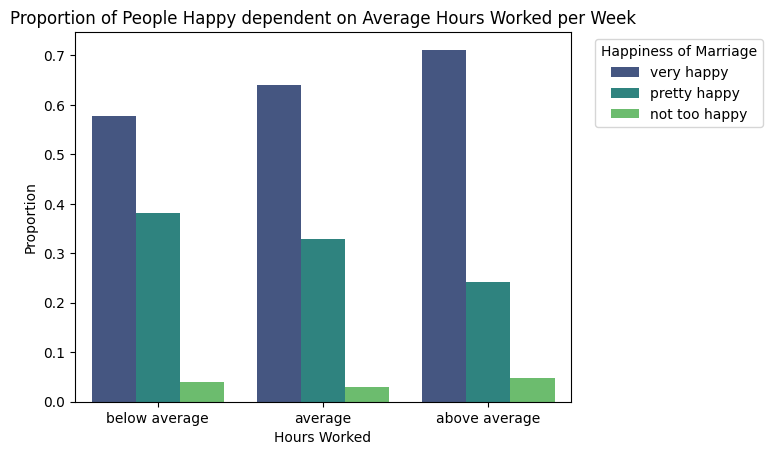

In [32]:
#looking at hours worked and happiness of marriage

hap_work = df['hapmar'].groupby(df['hours_worked']).value_counts(normalize=True).reset_index(name='proportion')

#looking at proportions, make bar chart
hap_work_plot  = sns.barplot(x='hours_worked', y='proportion', hue='hapmar', data=hap_work, palette='viridis')
plt.xlabel("Hours Worked")
plt.ylabel("Proportion")
plt.title("Proportion of People Happy dependent on Average Hours Worked per Week")
plt.legend(title = "Happiness of Marriage")
sns.move_legend(hap_work_plot, "upper right", bbox_to_anchor = (1.4, 1))
plt.show()

#This visual shows that the typical hours worked per week does not have much of an impact on the happiness of a marriage. Each bin has about the same bar display
#for happiness of marriage. I found this slightly surprising because I made the assumption that working many more hours per week would have an impact on happiness of marriage
#or vice versa with the possibility of unemployment. Marriage happiness seem to be resilient against hours worked. I also experimented with the bins and this did not have
#much of an impact either. Before, the bins were much more narrow, and then I decided to widen them. The bars barely changed.

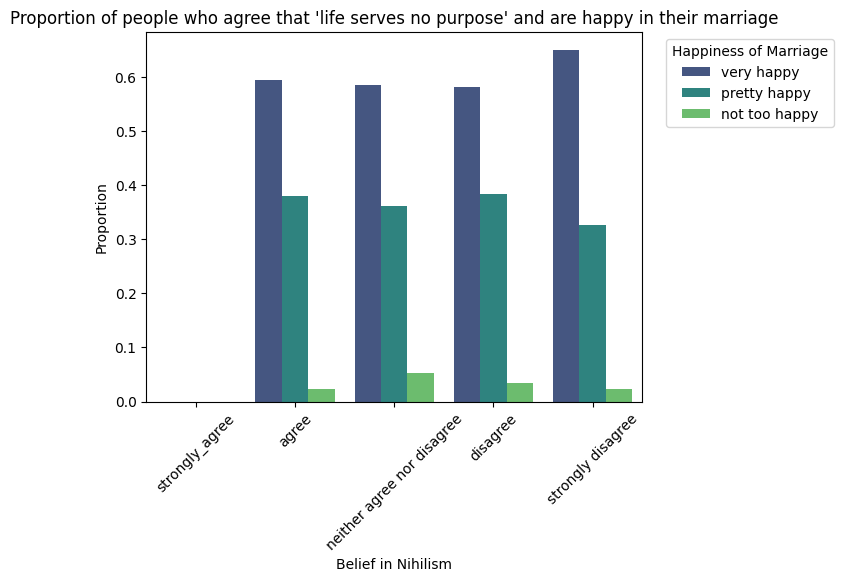

In [33]:
#looking at proportions for nihilism and happiness of marriage

#life serves no purpose
hap_n = df['hapmar'].groupby(df['nihilism']).value_counts(normalize = True).reset_index(name = 'proportion')
hap_n

custom_order = ['strongly_agree', 'agree', 'neither agree nor disagree', 'disagree', 'strongly disagree']

hap_box = sns.barplot(x='nihilism', y='proportion', hue='hapmar', data=hap_n, order =custom_order, palette='viridis')
plt.xlabel('Belief in Nihilism')
plt.ylabel('Proportion')
plt.title("Proportion of people who agree that 'life serves no purpose' and are happy in their marriage")
plt.xticks(rotation = 45)
plt.legend(title = "Happiness of Marriage")
sns.move_legend(hap_box, 'upper right' , bbox_to_anchor = (1.4, 1))
plt.show()

#This plot shows the range of people who agree or disagree with nihilistic viewpoints on happiness of marriage. This one also surprised me a bit. Nihilistic viewpoints,
#which are highly negative do not seem to have much impact on marriage happiness. Except that there are no data points for people with extreme nihilistic viewpoints
#who are married. I think this is an important part of the graph. One possible explanation is that people who don't see a purpose in life don't see a reason to get married
#in the first place. Anyway, I thought that people who have a strong belief that life has purpose would have happier marriages than people who have the opposite viewpoint.

Text(0.5, 1.0, 'Proportions of couples by Sex Frequency and Happiness in Marriage')

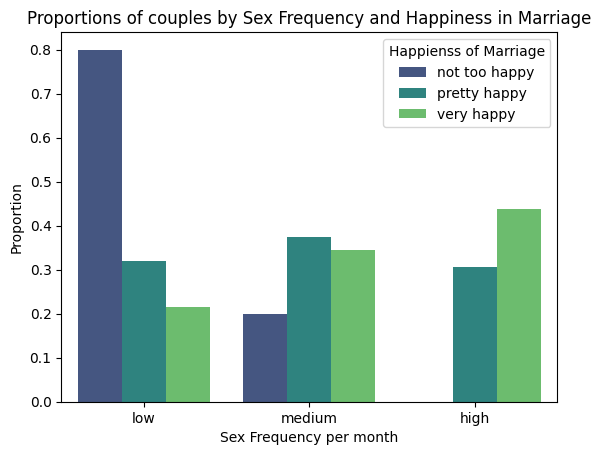

In [34]:
bins =[0, 3, 7, 60]
labels = ['low', 'medium', 'high']
df['sex_freq_mo'] = pd.cut(df['sexfreq2'], bins=bins, labels=labels, right = True)
#bin categories are 0-3, 4-7, 8+

sex_hap = df['sex_freq_mo'].groupby(df['hapmar']).value_counts(normalize = True).reset_index(name='proportion')

#side-by-side bar chart
sh_plot = sns.barplot(data=sex_hap, x='sex_freq_mo', y='proportion', hue='hapmar', palette='viridis')
plt.xlabel("Sex Frequency per month")
plt.ylabel("Proportion")
plt.legend(title = 'Happienss of Marriage')
plt.title("Proportions of couples by Sex Frequency and Happiness in Marriage")


#First I decided to bin the frequencies into three groups of high, medium, and low. This works out better for this type of graph. The frequency is measured on a per month basis.
# This graph has a few trends that stand out. First of all in the high category, there are no instances of people reporting that they are "not too happy" with their marriage.
#Also in the low frequency category, there is a large proportion of people reporting that they are "not too happy" in their marriage. This graph does not tell the whole story.
#There is also a strong likelihood of confounding variables. For example, switching the variables around, if people are more happy then they are having more sex with their partner.
#Still, the graph provides some valuable insights.

In [ ]:
#look at life outlook and marital status

life_mar = df['life'].groupby(df['marital']).value_counts(normalize = True).reset_index(name = "proportion")

#barplot
life_mar_plot = sns.barplot(data= life_mar, x='marital', y='proportion', hue='life', palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('proportion')
plt.title("Proportion of people's outlook on life by marital status")
plt.legend(title = 'Life Outlook')
sns.move_legend(life_mar_plot, "upper right", bbox_to_anchor = (1.3, 1))
plt.show()

#This graph surprised me in that life outlook does not appear to have much of an impact on marital status. I hypothesized that people who labeled life as mostly "dull", would
#tend to have more divorces than, for example, people who labeled life as "exciting" and are married. This was wrong. There were not many instances of people labeling
#life as dull. One of the only categories that varies a bit is the widowed category. Widows have a higher proportion of people who claim that life is routine or dull
#and less people who claim life is exciting. Over 50% of widows claim that life is routine, which is the most of any other category for marital status.

In [35]:
df['sathealt'].value_counts()
#on marital status

,count
sathealt,
great deal,7944
very great deal,6426
quite a bit,3618
a fair amount,3599
some,1099
a little,930
none,505


In [ ]:
mar_health = df['sathealt'].groupby(df['marital']).value_counts(normalize = True).reset_index(name='proportion')
mar_health

#barplot of physical health satisfaction on marital status

mar_health_plot = sns.barplot(data=mar_health, x='sathealt', y='proportion', hue='marital', palette='viridis')
plt.xlabel("Satisfaction Level with Overall Physical Health")
plt.ylabel("Proportion")
plt.title("Proportion of people satisfied with their health on marital status")
plt.xticks(rotation=45)
plt.legend(title = 'Marital Status')
plt.show()

#This side-by-side bar plot shows the the proportions of people with different levels of physical health condition satisfaction on marital status. I didn't think there
#would be any significant trends here, but I did want to make the plot just in case. Since married people tend to pick up similar habits in regards to physical health,
#such as eating the same meals, working out together, and other physical lifestyle choices that are often shared. I thought that there may be a difference for people who are
#separated/divorced vs married people since their habits would be independent of a partner. But, that does not seem to be the case. There is a slight trend of widowed people
#having the highest proportion reporting for lower satisfaction with their health ("a fair amount satisfied" and below). This makes sense because these people are likely
#to be older in age and have less stable physical health than younger categories.

In [36]:
df['frinum'].value_counts().describe()

#df['frinum'].quantile(.99)

,count
count,32.000000
mean,45.843750
std,64.317313
min,1.000000
25%,1.000000
50%,12.000000
75%,60.500000
max,186.000000


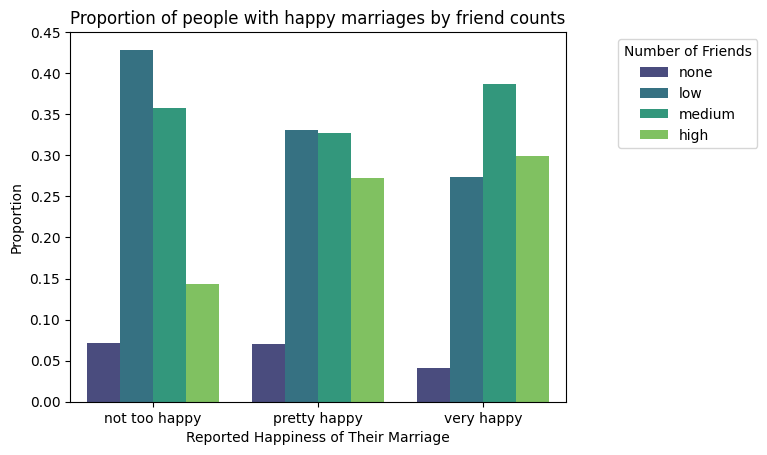

In [37]:
#friend count on life outlook
#1/3 quartile is 3 friends, 2/3 quartile is 6
#use default right inclusive
#want bin for zero, then, LMH

#none: 0, low: 1-3, medium: 4-6, high: 7+
bins = [0,1, 4, 7, 52]
labels = ['none','low', 'medium', 'high']
#not right inclusive, so zero friends has it's own bin
df['friend_ct'] = pd.cut(df['frinum'], bins=bins, labels=labels, right = False)

fr_hap = df['friend_ct'].groupby(df['hapmar']).value_counts(normalize=True).reset_index(name='proportion')
fr_hap

fig = sns.barplot(data=fr_hap, x='hapmar', y='proportion', hue='friend_ct', palette= 'viridis')
plt.xlabel('Reported Happiness of Their Marriage')
plt.ylabel('Proportion')

plt.title('Proportion of people with happy marriages by friend counts')
plt.legend(title='Number of Friends')
sns.move_legend(fig, 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()

#grouping by... out of people with the classfied marriage happiness.. how many friends do they have
#This bar chart groups people by their reported happiness of marriage and the number of close friends they have. Overall, there are not many people who reported that
#they do not have any close friends. There is a trend where people with a reported high number of friends seem to be in happier marriages. Less than 15% of people who reported
#to have a high number of close friends reported to be "not too happy" in their marriage. The other 85% reported a pretty or very happy marriage.

In [ ]:
#fr_hap = df['hapmar'].groupby(df['friend_ct']).value_counts(normalize=True).reset_index(name='proportion')
#fr_hap

In [38]:
df['income'].value_counts().describe() #not enough data

,count
count,12.000000
mean,5286.583333
std,9517.324619
min,902.000000
25%,1294.000000
50%,1363.500000
75%,5357.750000
max,34785.000000
